# Solar Neutrinos

Figure 5.6 from Chapter 5 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of the solar neutrino particle flux at 1 au from the Sun.  Data are from the BP04+ Solar Model.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig5_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Neutrino Spectrum Data

Data are in multiple files by the neutrino source decay channel

PP:
 * pp = p-p chain $p + p \to {\rm D} + e^+ + \nu_e$
 * boron8 = p-p chain $^8{\rm B} \to ^8{\rm Be} + e^+ + \nu_e$
 * hep reaction = $p + \,^3\textrm{He} \to \,^4\textrm{He} + e^+ + \nu_e$
 
CNO Cycle:
 * nitrogen13 = CNO Cycle $^{13}{\rm N} \to \,^{13}{\rm C} + e^+ + \nu_e$
 * oxygen15 = CNO Cycle $^{15}{\rm O} \to \,^{15}{\rm N} + e^+ + \nu_e$
 * fluorine17 = CNO Cycle $^{17}{\rm F} \to \,^{17}{\rm O} + e^+ + \nu_e$

The data files are from [John Bahcall's Neutrino Software and Data](http://www.sns.ias.edu/~jnb/SNdata/sndata.html).  The text files used to plot the energy spectra are as follows:
 * pp: http://www.sns.ias.edu/~jnb/SNdata/ppspectrum.html
 * $^8$B: http://www.sns.ias.edu/~jnb/SNdata/b8spectrum.html
 * CNO: http://www.sns.ias.edu/~jnb/SNdata/cnospectra.html
Some reformatting was required to get into a common file format for this plot.

There are also are three neutrino emission-lines:
 * $^{7}\rm{Be}$ ground-state transition at 861.3 keV
 * $^{7}\rm{Be}$ excited state transition at 384.3 keV.
 * pep reaction at 1.445 MeV
 
Total $^7\rm{Be}$ neutrino flux is from the BP04+ model is
$4.65\times10^9$cm$^{-2}$s$^{-1}$, so the line fluxes are computed using a branching ratio f=0.104 for the low 
energy $^7\rm{Be}$ decay and  f=0.896 for the high-energy decay is an average of experimental results 
(Ajzenberg-Selove, F. 1979, "Energy levels of light nuclei A = 5-10," Nucl Phys, A320, 1).



In [3]:
channels = ['pp','hep','boron8','nitrogen13','oxygen15','fluorine17']

nuE = {}  # neutrino energy in MeV
nuFlux = {} # neutrino particle flux in. cm^-2 s^-1 MeV^-1
for channel in channels:
    dataFile = f'{channel}.txt'
    data = pd.read_csv(dataFile,sep=r'\s+',header=None)
    nuE[channel] = np.array(data[0])
    nuFlux[channel] = np.array(data[1])

# 7Be lines (units are cm^-2 s^-1)

totalBe = 4.65e9 # cm^-2 s^-1

eBe1 = 0.38601 # MeV
fluxBe1 = 10.0**(8.6845)

eBe2 = 0.86298 # MeV
fluxBe2 = 10.0**(9.6197)

# pep emission lines

ePEP = 1.44511
fluxPEP = 10.0**(8.1523)

# limits

minE = 0.1 # MeV
maxE = 20.0
minF = 10.0 # particle cm^-2 s^-1 MeV^-1
maxF = 1.0e12


## Figure 5.6

Plot of particle flux vs. energy on log-log axes. Neutrinos from p-p are solid lines, from CNO are dashed lines. Draw the two $^7{\rm Be}$ lines as thick blue lines, and label the curves.  Omit pep and hep processes to reduce clutter.

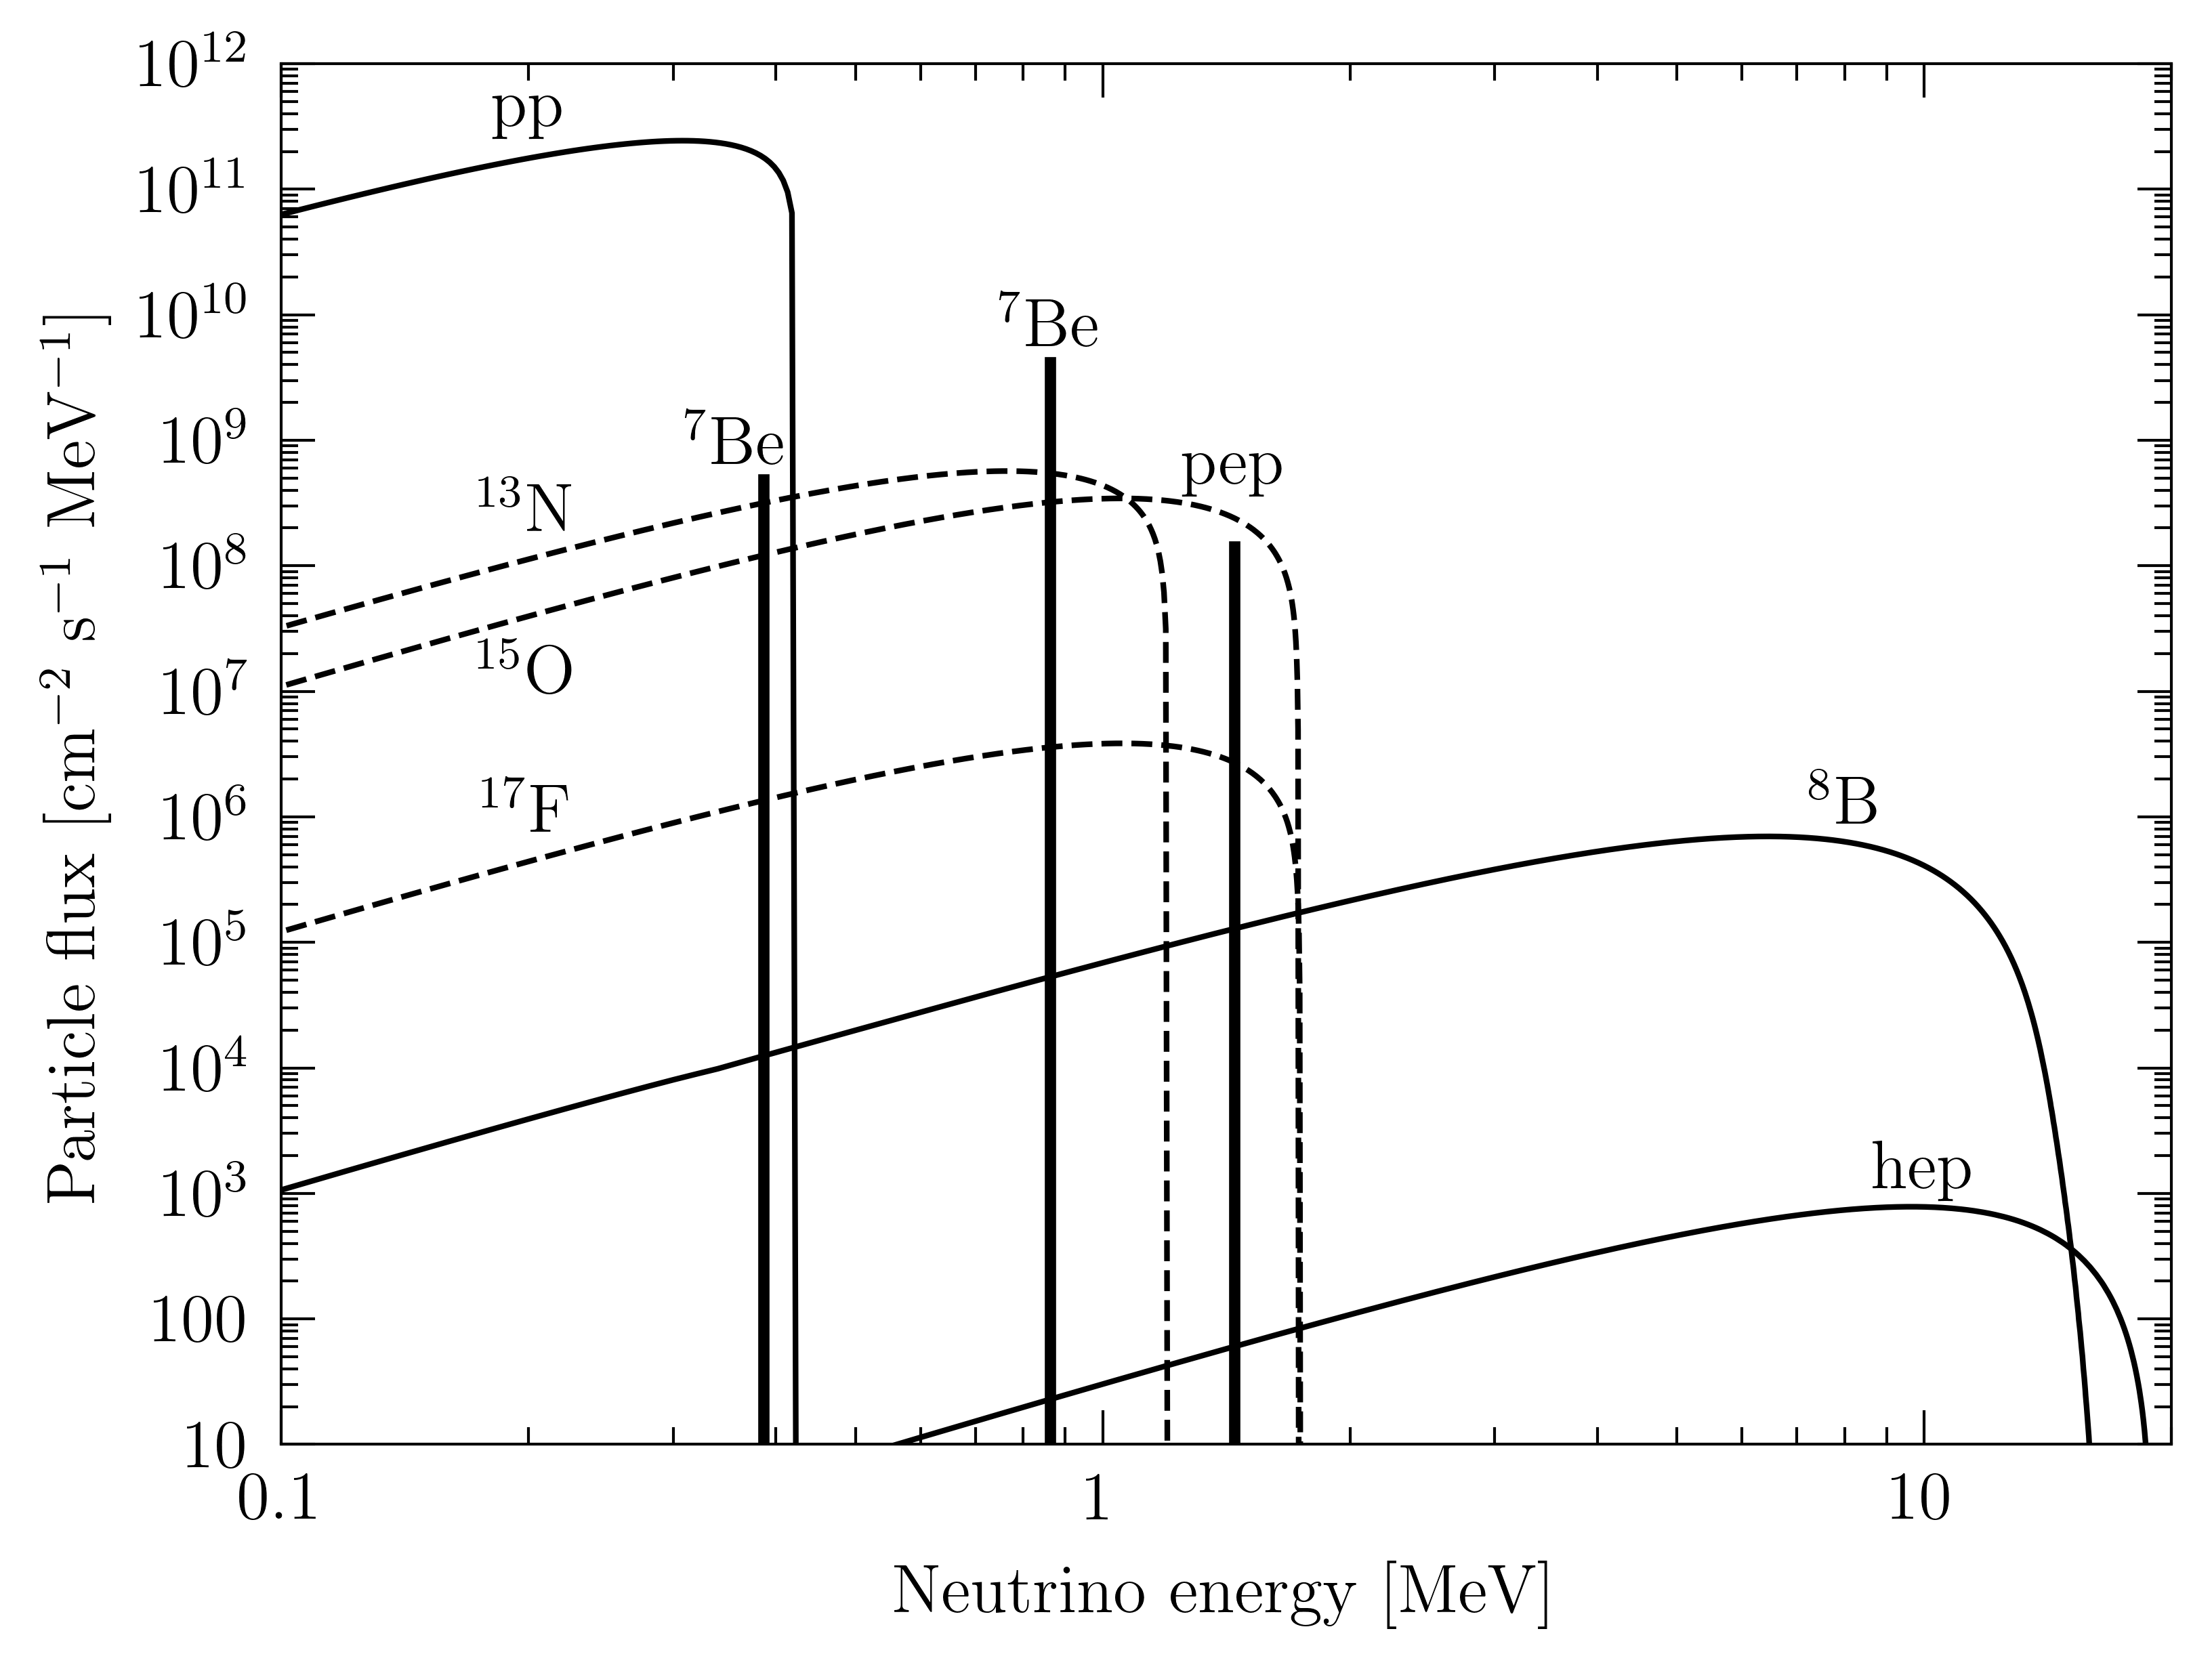

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)
    
ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

ax.set_xlim(minE,maxE)
ax.set_xscale('log')
ax.set_xlabel(r'Neutrino energy [MeV]')
ax.xaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.xaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks([0.1,1.,10.])
ax.set_xticklabels(['0.1','1','10'])

ax.set_ylim(minF,maxF)
ax.set_yscale('log')
ax.set_ylabel(r'Particle flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([10,100,1.0E3,1.0E4,1.0E5,1.0E6,1.0e7,1.0e8,1.0e9,1.0e10,1.0e11,1.0e12])
ax.set_yticklabels(['10','100','10$^{3}$','10$^{4}$','10$^{5}$','10$^{6}$','10$^{7}$','10$^{8}$','10$^{9}$',
                    '10$^{10}$','10$^{11}$','10$^{12}$'])

# p-p neutrinos

for channel in ['pp','boron8','hep']:
    ax.plot(nuE[channel],nuFlux[channel],'-',color='black',lw=1)

# CNO neutrinos

for channel in ['nitrogen13','fluorine17','oxygen15']:
    ax.plot(nuE[channel],nuFlux[channel],'--',color='black',lw=1)
    
# 7Be and pep emission lines

ax.plot([eBe1,eBe1],[minE,fluxBe1],'-',color='black',lw=2,zorder=10)
ax.plot([eBe2,eBe2],[minE,fluxBe2],'-',color='black',lw=2,zorder=10)
ax.plot([ePEP,ePEP],[minE,fluxPEP],'-',color='black',lw=2,zorder=10)

# Label the plot

ax.text(0.2,2.5e11,'pp',color='black',ha='center',va='bottom',fontsize=axisFontSize)
ax.text(8.0,np.max(nuFlux['boron8']),r'$^8$B',color='black',ha='center',va='bottom',fontsize=axisFontSize)
ax.text(10.0,1.1*np.max(nuFlux['hep']),r'hep',color='black',ha='center',va='bottom',fontsize=axisFontSize)

ax.text(0.2,1.5e8,r'$^{13}$N',color='black',ha='center',va='bottom',fontsize=axisFontSize)
ax.text(0.2,7.5e6,r'$^{15}$O',color='black',ha='center',va='bottom',fontsize=axisFontSize)
ax.text(0.2,6e5,r'$^{17}$F',color='black',ha='center',va='bottom',fontsize=axisFontSize)

ax.text(0.925*eBe1,1.05*fluxBe1,r'$^7$Be',color='black',ha='center',va='bottom',fontsize=axisFontSize)
ax.text(eBe2,1.05*fluxBe2,r'$^7$Be',color='black',ha='center',va='bottom',fontsize=axisFontSize)
ax.text(ePEP,2.5*fluxPEP,r'pep',color='black',ha='center',va='bottom',fontsize=axisFontSize)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')